In [2]:
import numpy as np
import pandas as pd
#loading the dataset
data = pd.read_csv('/content/Churn_Modelling.csv')


In [3]:
#printing the first five rows of the dataset by using head function
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
newdata = data.copy()

In [8]:
#To identify the unique values of each attribute
features = newdata.columns
for feature in features:
  print(f'{feature}->{newdata[feature].nunique()}')

RowNumber->10000
CustomerId->10000
Surname->2932
CreditScore->460
Geography->3
Gender->2
Age->70
Tenure->11
Balance->6382
NumOfProducts->4
HasCrCard->2
IsActiveMember->2
EstimatedSalary->9999
Exited->2


In [9]:
newdata.isnull().sum()/newdata.shape[0]

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [10]:
#function for droping null values from data
def cleaning_dataset_drop(data):
  assert isinstance(data,pd.DataFrame)
  data.dropna(inplace = True)
  indices_to_keep = ~data.isin([np.nan,np.inf,-np.inf]).any(1)
  return data[indices_to_keep].astype(np.float64)

In [11]:
#function for filling null values of data
def cleaning_dataset_fill(data):
    assert isinstance(data, pd.DataFrame)
    # Fill numeric columns with their mean
    num_cols = data.select_dtypes(include=['int64', 'float64']).columns
    data[num_cols] = data[num_cols].apply(lambda x: x.fillna(x.mean()), axis=0)

    # For categorical columns, you can decide to fill with the mode value
    cat_cols = data.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        data[col] = data[col].fillna(data[col].mode()[0])

    # After filling NaN values, check for infinite values and handle them as well
    indices_to_keep = ~data.isin([np.inf, -np.inf]).any(1)
    return data[indices_to_keep].astype(np.float64)

In [12]:
#For time-series data it is helpful to handle missing data
newdata = newdata.interpolate()

In [13]:
#after interpolation also,if we found any infinity values then that will drop from the data
newdata = newdata.dropna()
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
#printing the unique  categorical attribute
def unique_object_names(data):
  for attribute in data:
    if data[attribute].dtype == 'object':
      print(f'{attribute}->{data[attribute].unique()}')

In [15]:
unique_object_names(newdata)

Surname->['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography->['France' 'Spain' 'Germany']
Gender->['Female' 'Male']


In [16]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Filtering the dataset for customers who have not churned
# 'churn' == 0 indicates the customers who stayed with the service
Customer_Stayed = data[data['Exited'] == 0]['Age']

# Filtering the dataset for customers who have churned
# 'churn' == 1 indicates the customers who have left the service
Customer_Churned = data[data['Exited'] == 1]['Age']

# The two lines above create separate data series for the ages of customers who stayed and who churned
# These series can then be used to compare the age distributions between the two groups using visualizations like histograms or boxplots


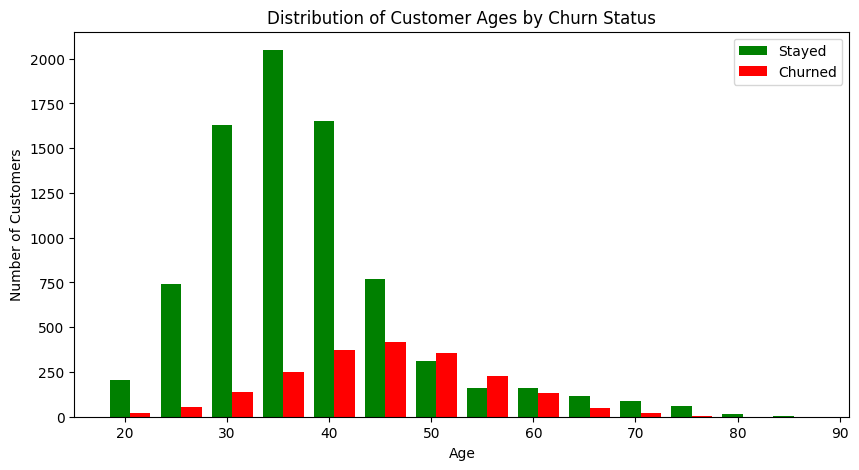

In [18]:
plt.figure(figsize=(10, 5))
# Plot a histogram for both Customer_Stayed and Customer_Churned data with specified bins and colors
plt.hist([Customer_Stayed, Customer_Churned], bins=range(18, 90, 5), color=['green', 'red'], label=['Stayed', 'Churned'])
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Ages by Churn Status')
plt.legend()
plt.show()

In [19]:


from sklearn.metrics import confusion_matrix

# Generate some random predictions and actual values
y_true = np.random.randint(0, 2, size=100)
y_pred = np.random.randint(0, 2, size=100)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print(cm)


[[25 22]
 [26 27]]


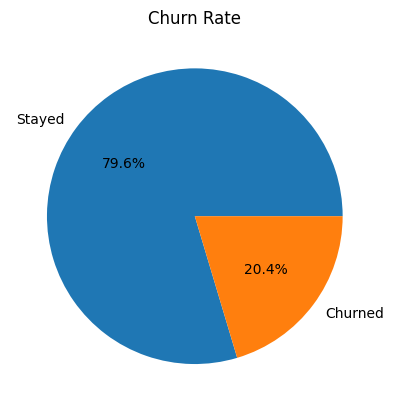

In [20]:

# Define the category names and their respective counts
categories = ["Stayed", "Churned"]
counts = [len(Customer_Stayed), len(Customer_Churned)]

# Create a pie chart
plt.pie(counts, labels=categories, autopct="%1.1f%%")

# Add a title
plt.title("Churn Rate")

# Show the pie chart
plt.show()


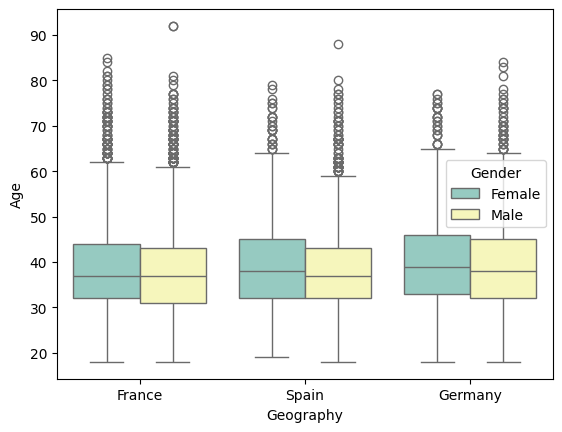

In [21]:


sns.boxplot(x="Geography", y="Age", hue="Gender", data=newdata, palette="Set3")
plt.show()


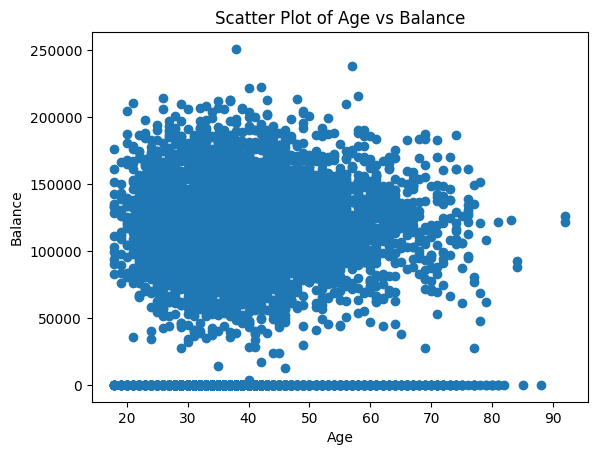

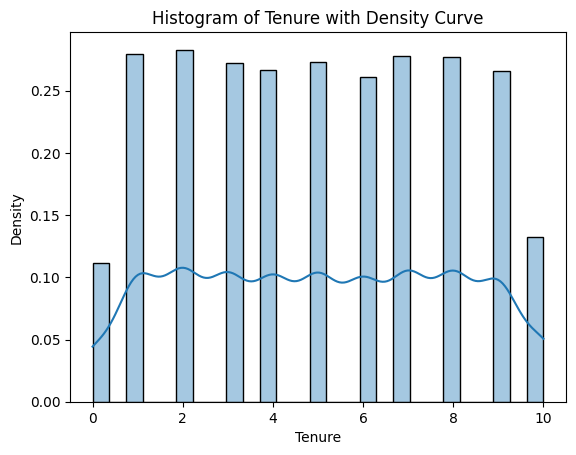

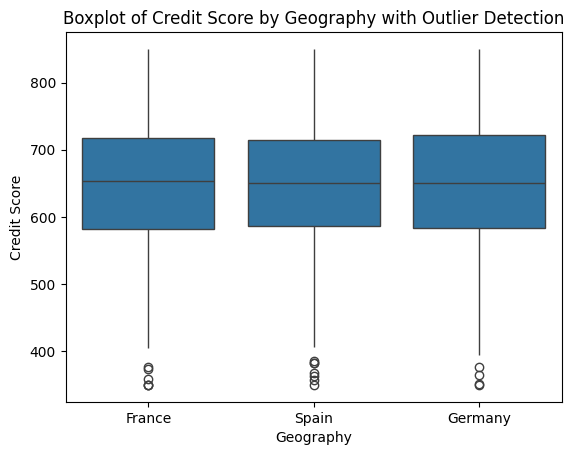

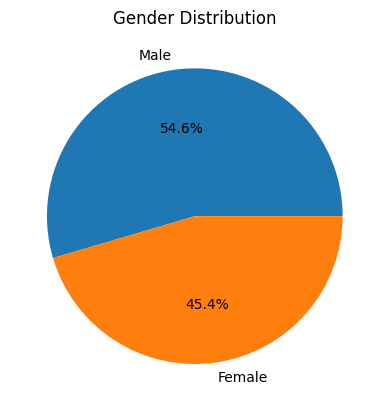

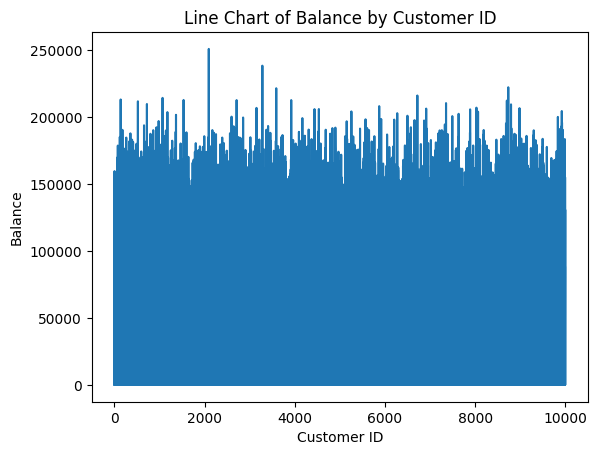

In [22]:

# Scatter plot
plt.scatter(newdata['Age'], newdata['Balance'])
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot of Age vs Balance')
plt.show()

# Histogram with density curve
sns.histplot(newdata['Tenure'], kde=True, stat="density", alpha=0.4)
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.title('Histogram of Tenure with Density Curve')
plt.show()

# Boxplot with outlier detection
sns.boxplot(x=newdata['Geography'], y=newdata['CreditScore'], showcaps=False)
plt.xlabel('Geography')
plt.ylabel('Credit Score')
plt.title('Boxplot of Credit Score by Geography with Outlier Detection')
plt.show()

# Pie chart with percentages
labels = ['Male', 'Female']
sizes = [len(newdata[newdata['Gender'] == 'Male']), len(newdata[newdata['Gender'] == 'Female'])]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title('Gender Distribution')
plt.show()

# Line chart
x = range(1, len(newdata) + 1)
y = newdata['Balance']
plt.plot(x, y)
plt.xlabel('Customer ID')
plt.ylabel('Balance')
plt.title('Line Chart of Balance by Customer ID')
plt.show()


In [23]:


from sklearn.model_selection import train_test_split

# Separate features and target
X = newdata.drop('Geography', axis=1)  # Replace 'Geography' with the desired target column name
y = newdata['Geography']  # Replace 'Geography' with the desired target column name

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the training and testing sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (7500, 13)
Shape of y_train: (7500,)
Shape of X_test: (2500, 13)
Shape of y_test: (2500,)


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your dataset
data = pd.read_csv('/content/Churn_Modelling.csv')  # Replace 'your_dataset.csv' with your actual dataset path

# Define target column
target = 'Exited'  # Replace 'label' with your actual target column name

# Separate the data into features and target
X = data.drop(columns=[target])

# Remove all string columns
X = X.select_dtypes(exclude=['object'])

# Ensure the target column is numeric
y = data[target].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in the target column if any
data_cleaned = pd.concat([X, y], axis=1).dropna()
X = data_cleaned.drop(columns=[target])
y = data_cleaned[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use average='weighted' for multiclass classification
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.86
Precision: 0.85
Recall: 0.86
F1 Score: 0.85
Confusion Matrix:
[[1547   60]
 [ 216  177]]


In [25]:


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Define a list of models
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Train each model
for model in models:
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print()


Model: LogisticRegression
Accuracy: 0.80
Precision: 0.65
Recall: 0.80
F1 Score: 0.72



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: SVC
Accuracy: 0.80
Precision: 0.65
Recall: 0.80
F1 Score: 0.72

Model: DecisionTreeClassifier
Accuracy: 0.77
Precision: 0.79
Recall: 0.77
F1 Score: 0.78

Model: RandomForestClassifier
Accuracy: 0.86
Precision: 0.85
Recall: 0.86
F1 Score: 0.84

Model: GradientBoostingClassifier
Accuracy: 0.86
Precision: 0.85
Recall: 0.86
F1 Score: 0.84

Model: AdaBoostClassifier
Accuracy: 0.85
Precision: 0.84
Recall: 0.85
F1 Score: 0.84



In [26]:


# Define a list of models
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Train each model and print confusion matrix
for model in models:
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print model name and confusion matrix
    print(f'Model: {model.__class__.__name__}')
    print(f'Confusion Matrix:')
    print(conf_matrix)
    print()


Model: LogisticRegression
Confusion Matrix:
[[1607    0]
 [ 393    0]]

Model: SVC
Confusion Matrix:
[[1607    0]
 [ 393    0]]

Model: DecisionTreeClassifier
Confusion Matrix:
[[1341  266]
 [ 195  198]]

Model: RandomForestClassifier
Confusion Matrix:
[[1543   64]
 [ 215  178]]

Model: GradientBoostingClassifier
Confusion Matrix:
[[1557   50]
 [ 227  166]]

Model: AdaBoostClassifier
Confusion Matrix:
[[1526   81]
 [ 213  180]]



In [27]:

# Generate some random data
data = np.random.randint(0, 100, size=(100, 5))

# Define the model
model = RandomForestClassifier()

# Train the model
model.fit(data[:, :-1], data[:, -1])

# Predict the labels for the data
predicted_labels = model.predict(data[:, :-1])

# Print the actual and predicted labels
print("Actual labels:", data[:, -1])
print("Predicted labels:", predicted_labels)


Actual labels: [50 48 16 41 96 66 52 49 79 22 39 26 86 75 26 45 66 60 22 57 91 41  9  5
 55 44 70 92 76 60  0 15 52 16 55 15 89 92 22 22 84 69  4 34 38 88  1  7
 43 75 59 54  1 98  9 78 40 46 78 76 87 16 80 69 66  2 68 87 58 37 32 51
 26 81 18 18 70 45 21 69 98 10 79 86 20 62 50 92 33 15 10 30 70 57 74 86
 46 53 54 76]
Predicted labels: [50 48 16 41 96 66 52 49 79 22 39 26 86 75 26 45 66 60 22 57 91 41  9  5
 55 44 70 92 76 60  0 15 52 16 55 15 89 92 22 22 84 69  4 34 38 88  1  7
 43 75 59 54  1 98  9 78 40 46 78 76 87 16 80 69 66  2 68 87 58 37 32 51
 26 81 18 18 70 45 21 69 98 10 79 86 20 62 50 92 33 15 10 30 70 57 74 86
 46 53 54 76]
